Developing a model that can via camera photos classify images. In the Interface_Debug.py contains an button that can capture images via webcam and passes that to the AI model that handels the classification task.

1. **Dataset**

In [24]:
import matplotlib.pyplot as plt
from keras import datasets, layers, models
import tensorflow as tf

In [11]:
(training_images, training_labels), (test_images, test_labels) = datasets.cifar10.load_data()
training_images, test_images = training_images/255, test_images/255 #Dividing pixels 

In [12]:
classification_names = ['Plane', 'Car', 'Airplane', 'Horse', 'Dog', 'Frog', 'Truck', 'Deer', 'Bird', 'Ship']

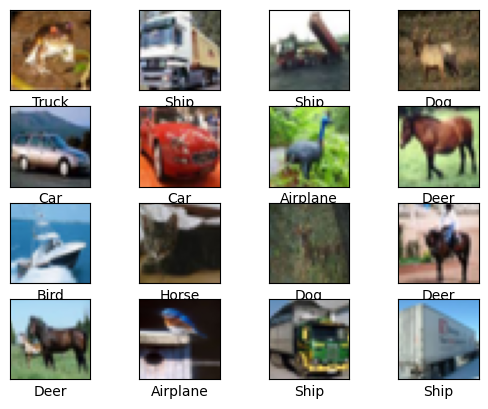

In [13]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classification_names[training_labels[i][0]])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
plt.show()
    

2. **Preprocessing**

In [14]:
training_images = training_images[:20000]
test_images = test_images[:4000]
training_labels = training_labels[:20000]
test_labels = test_labels[:4000]

3. **Model**

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4956 - loss: 1.3978 - val_accuracy: 0.5433 - val_loss: 1.2765
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5619 - loss: 1.2301 - val_accuracy: 0.5713 - val_loss: 1.1862
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6084 - loss: 1.1134 - val_accuracy: 0.5885 - val_loss: 1.1540
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6449 - loss: 1.0026 - val_accuracy: 0.5990 - val_loss: 1.1072
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6706 - loss: 0.9384 - val_accuracy: 0.6220 - val_loss: 1.0786
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6929 - loss: 0.8656 - val_accuracy: 0.6363 - val_loss: 1.0482
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7129 - loss: 0.8078 - val_accuracy: 0.6342 - val_loss: 1.0716
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7350 - loss: 0.7452 - val_accu

4. **Evaluate**

In [21]:
accuracy, loss = model.evaluate(test_images, test_labels)
print(accuracy)
print(loss)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 1.0784
1.0862326622009277
0.6480000019073486


5. **Saving the model**

In [26]:
model.save('img_classifier.keras')